In [1]:
import numpy as np
import h5py
import pandas as pd
import os

In [3]:
# Path to your HDF5 file
hdf5_file = "/teamspace/studios/this_studio/datasets/train_data.h5"

# Open the HDF5 file
with h5py.File(hdf5_file, 'r') as hdf:
    # Extract the images (X)
    X = np.array(hdf['images'])
    
    # Extract the labels (y)
    y = np.array(hdf['labels'])

# Check the shapes to ensure they are correct
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (images): (1100000, 16, 16, 6)
Shape of y (labels): (1100000,)


In [5]:
import numpy as np

# Assuming `data` is your input array with shape (N, 16, 16, 6)
# Initialize an empty list to store histograms for each channel
histograms = []

# Iterate over each channel (last dimension)
for channel in range(X.shape[-1]):
    # Extract the data for the current channel
    channel_data = X[..., channel]
    
    # Flatten the data and filter for negative values
    negative_values = channel_data[channel_data < 0].flatten()
    
    # Calculate the histogram for the negative values
    # You can adjust the number of bins and range as needed
    histogram, bin_edges = np.histogram(negative_values, bins=10, range=(-9999, 0))
    
    # Store the histogram
    histograms.append(histogram)

# `histograms` now contains a histogram of negative values for each channel

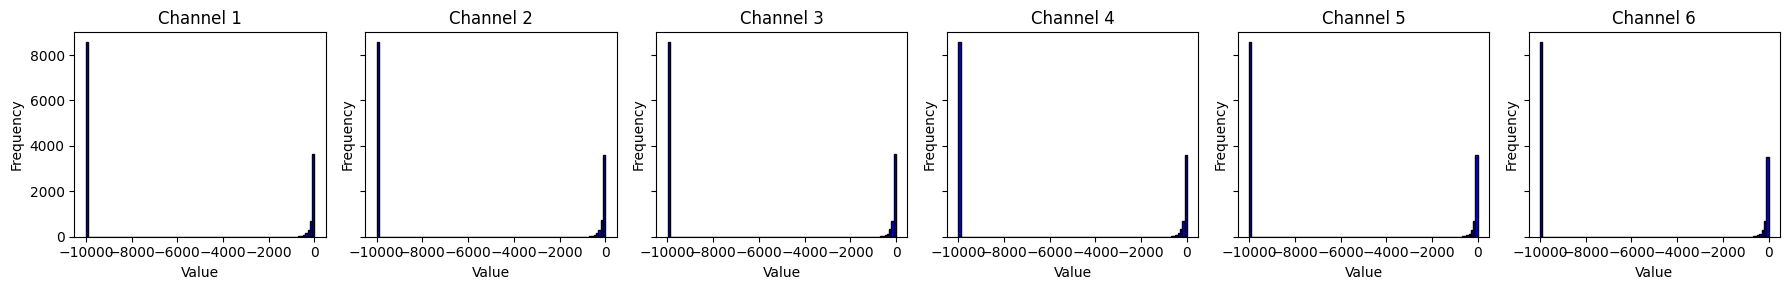

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `data` is your input array with shape (N, 16, 16, 6)
# Initialize a figure for the histograms
fig, axes = plt.subplots(1, 6, figsize=(18, 3), sharey=True)

# Iterate over each channel (last dimension)
for channel in range(X.shape[-1]):
    # Extract the data for the current channel
    channel_data = X[..., channel]
    
    # Flatten the data and filter for negative values
    negative_values = channel_data[channel_data < 0].flatten()
    
    # Plot the histogram for the negative values
    axes[channel].hist(negative_values, bins=100, color='blue', edgecolor='black')
    axes[channel].set_title(f'Channel {channel + 1}')
    axes[channel].set_xlabel('Value')
    axes[channel].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Get the min and max values per channel (axis 0 is N, axis 1 and 2 are 16x16, axis 3 is the channel)
min_per_channel = np.min(X, axis=(0, 1, 2))
max_per_channel = np.max(X, axis=(0, 1, 2))

print("Min values per channel:", min_per_channel)
print("Max values per channel:", max_per_channel)

Min values per channel: [-9999 -9999 -9999 -9999 -9999 -9999]
Max values per channel: [20000 20000 20000 20000 20000 20000]


In [12]:
# Step 1: Count the number of 1's in y
num_ones = np.sum(y == 1)
num_zeros = np.sum(y == 0)
num_ones, num_zeros
print(f"Proportion of 1's: {num_ones / len(y)}")
print(f"Proportion of 0's: {num_zeros / len(y)}")

Proportion of 1's: 0.09090909090909091
Proportion of 0's: 0.9090909090909091


In [13]:
# Path to your HDF5 file
hdf5_file = "/teamspace/studios/this_studio/dataset/optimized_train_data.h5"

# Open the HDF5 file
with h5py.File(hdf5_file, 'r') as hdf:
    # Extract the images (X)
    X_opt = np.array(hdf['images'])
    
    # Extract the labels (y)
    y_opt = np.array(hdf['labels'])

# Check the shapes to ensure they are correct
print("Shape of X (images):", X_opt.shape)
print("Shape of y (labels):", y_opt.shape)


Shape of X (images): (1100000, 16, 16, 6)
Shape of y (labels): (1100000,)


In [15]:
# Check if the y_opt is the same as y
np.all(y_opt == y)

# Checl if the X_opt is the same as X
np.all(X_opt == X)

True

In [2]:
import h5py
import numpy as np

# Path to your original HDF5 file
hdf5_file = "/teamspace/studios/this_studio/dataset/train_data.h5"

# Open the HDF5 file and extract data, dtype, and metadata
with h5py.File(hdf5_file, 'r') as hdf:
    # Extract the images (X) and labels (y)
    X = np.array(hdf['images'])
    y = np.array(hdf['labels'])
    
    # Extract the metadata (dtype, chunks, and attributes like band_names)
    dtype_images = hdf['images'].dtype
    chunk_size = hdf['images'].chunks
    band_names = hdf['images'].attrs['band_names']

# Path to save the new HDF5 file
new_hdf5_file = "/teamspace/studios/this_studio/dataset/optimized_train_data.h5"

# Create the new HDF5 file with optimized chunk size
# Set chunk size to (32, 16, 16, 6) based on our earlier discussion
new_chunk_size = (32, 16, 16, 6)

with h5py.File(new_hdf5_file, 'w') as new_hdf:
    # Create the images dataset with optimized chunk size and preserve dtype
    images_dset = new_hdf.create_dataset('images', data=X, 
                                         chunks=new_chunk_size, 
                                         compression='gzip', 
                                         dtype=dtype_images)
    
    # Set the attributes, preserving the band_names
    images_dset.attrs['band_names'] = band_names
    
    # Create the labels dataset with optimized chunk size
    new_hdf.create_dataset('labels', data=y, 
                           chunks=(32,), 
                           compression='gzip', 
                           dtype=y.dtype)

print(f"New HDF5 file created at {new_hdf5_file} with optimized chunking.")


New HDF5 file created at /teamspace/studios/this_studio/dataset/optimized_train_data.h5 with optimized chunking.


# Create balanced dataset


In [4]:
# Path to your HDF5 file
hdf5_file = "/teamspace/studios/this_studio/dataset/optimized_train_data.h5"

# Open the HDF5 file and extract data, dtype, and metadata
with h5py.File(hdf5_file, 'r') as hdf:
    # Extract the images (X) and labels (y)
    X = np.array(hdf['images'])
    y = np.array(hdf['labels'])
    
    # Extract the metadata (dtype, chunks, and attributes like band_names)
    dtype_images = hdf['images'].dtype
    chunk_size = hdf['images'].chunks
    band_names = hdf['images'].attrs['band_names']

# Check the shapes to ensure they are correct
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

# Step 1: Count the number of 1's in y
num_ones = np.sum(y == 1)

# Step 2: Get indices of 0's and 1's in y
ones_indices = np.where(y == 1)[0]
zeros_indices = np.where(y == 0)[0]

# Step 3: Randomly sample the same number of 0's as there are 1's
balanced_zero_indices = np.random.choice(zeros_indices, num_ones, replace=False)

# Step 4: Combine indices of 0's and 1's
balanced_indices = np.concatenate([ones_indices, balanced_zero_indices])

# Step 5: Create balanced X and y
X_balanced = X[balanced_indices]
y_balanced = y[balanced_indices]

# Display the number of 0's and 1's in the balanced y
print(f"Number of 1's in balanced y: {np.sum(y_balanced == 1)}")
print(f"Number of 0's in balanced y: {np.sum(y_balanced == 0)}")


Shape of X (images): (1100000, 16, 16, 6)
Shape of y (labels): (1100000,)
Number of 1's in balanced y: 100000
Number of 0's in balanced y: 100000


In [5]:
print("Shape of X_balanced (images):", X_balanced.shape)
print("Shape of y_balanced (labels):", y_balanced.shape)

Shape of X_balanced (images): (200000, 16, 16, 6)
Shape of y_balanced (labels): (200000,)


In [6]:
# Path to save the new HDF5 file
new_hdf5_file = "/teamspace/studios/this_studio/dataset/optimized_balanced_train_data.h5"

# Create the new HDF5 file with optimized chunk size
# Set chunk size to (32, 16, 16, 6) based on our earlier discussion
new_chunk_size = (32, 16, 16, 6)

with h5py.File(new_hdf5_file, 'w') as new_hdf:
    # Create the images dataset with optimized chunk size and preserve dtype
    images_dset = new_hdf.create_dataset('images', data=X_balanced, 
                                         chunks=new_chunk_size, 
                                         compression='gzip', 
                                         dtype=dtype_images)
    
    # Set the attributes, preserving the band_names
    images_dset.attrs['band_names'] = band_names
    
    # Create the labels dataset with optimized chunk size
    new_hdf.create_dataset('labels', data=y_balanced, 
                           chunks=(32,), 
                           compression='gzip', 
                           dtype=y.dtype)

print(f"New HDF5 file created at {new_hdf5_file} with balanced data.")

New HDF5 file created at /teamspace/studios/this_studio/dataset/optimized_balanced_train_data.h5 with balanced data.


In [1]:
import numpy as np
import h5py
import pandas as pd
import os

PATH = '/teamspace/studios/this_studio/datasets/'
HDF5_FILE_NAME = 'test_data.h5'


def load_images(input_hdf5_file, dtype=np.uint16):
    """
    Load images from an HDF5 file.
    
    Parameters
    ----------
    input_hdf5_file : str
        Path to the input HDF5 file.
    
    Returns
    -------
    numpy.ndarray
        Images loaded from the HDF5 file.
    """
    try:
        # Open the HDF5 file and extract the images
        with h5py.File(input_hdf5_file, 'r') as hdf:
            # Check if required datasets exist in the input HDF5 file
            if 'images' not in hdf:
                raise ValueError("Required dataset 'images' not found in the HDF5 file.")
            
            # Load the images
            images = np.array(hdf['images'], dtype=dtype)
            #images = hdf['images'][:].astype(dtype)
        hdf.close()
        return images
    
    except OSError as e:
        raise IOError(f"Error reading the HDF5 file: {e}")

input_hdf5_file = os.path.join(PATH, HDF5_FILE_NAME)
X_int  = load_images(input_hdf5_file, dtype=np.int16)
X_uint = load_images(input_hdf5_file, dtype=np.uint16)


In [2]:
np.min(X_int, axis=(0, 1, 2))
# Encontrar índices n con al menos un valor negativo
indices_con_negativos = [n for n in range(X_int.shape[0]) if np.any(X_int[n] < 0)]
indices_con_negativos

# Porceentaje de imágenes con al menos un valor negativo
porcentaje_negativos = len(indices_con_negativos) / X_int.shape[0] * 100
print(f"Porcentaje de imágenes con al menos un valor negativo: {porcentaje_negativos:.2f}%")

Porcentaje de imágenes con al menos un valor negativo: 0.39%


Min value: [-9999 -9999 -9999 -9999 -9999 -9999] | Max value: [4234 4313 4273 4421 4107 4482]


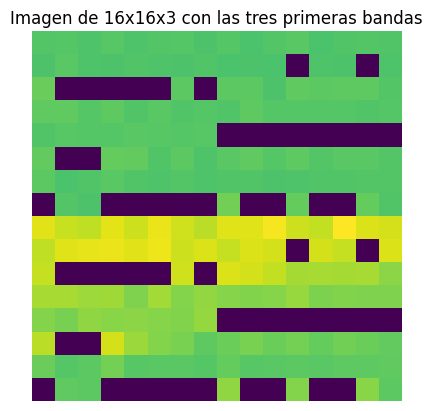

In [3]:
import numpy as np
import matplotlib.pyplot as plt

i= 1203
# Extraer las primeras tres bandas de la primera imagen
image = X_int[i]
min = np.min(image, axis=(0, 1))
max = np.max(image, axis=(0, 1))
print(f"Min value: {min} | Max value: {max}")
# Normalizar las bandas entre 0 y 1
normalized_int_image = (image-min)/(max-min)

# Plotear la imagen
plt.imshow(normalized_int_image[...,0], cmap='viridis')
plt.axis('off')  # Ocultar ejes
plt.title('Imagen de 16x16x3 con las tres primeras bandas')
plt.show()

In [6]:
image.shape

(16, 16, 6)

Min value: [0 0 0 0 0 0] | Max value: [4234 4313 4273 4421 4107 4482]


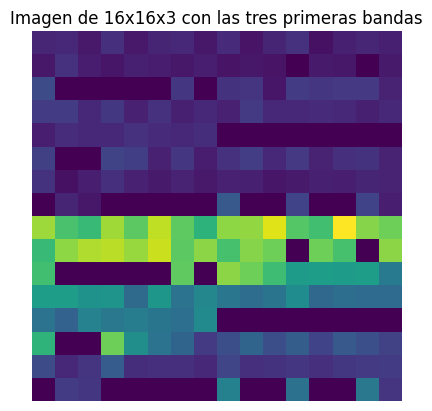

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer las primeras tres bandas de la primera imagen
image = X_uint[i]
min = np.min(image, axis=(0, 1))
max = np.max(image, axis=(0, 1))
print(f"Min value: {min} | Max value: {max}")
# Normalizar las bandas entre 0 y 1
normalized_int_image = (image-min)/(max-min)

# Plotear la imagen
plt.imshow(normalized_int_image[...,0], cmap='viridis')
plt.axis('off')  # Ocultar ejes
plt.title('Imagen de 16x16x3 con las tres primeras bandas')
plt.show()

In [24]:
type(normalized_int_image[0,0,0])

numpy.float64